#### Aspectos destacados del EDA (Análisis Exploratorio de Datos)

1. Importar el archivo de datos.
2. Seleccionar campos (columnas) útiles y sin redundancias.
3. Corregir nombres de campos.
4. Búsqueda y formateo de valores faltantes.
5. Eliminacion de filas vacías.
6. Identificar y corregir tipo de datos por campo.
7. Busqueda y eliminación de registros (filas) repetidos.
8. Describir la estructura de cada tabla  head(), tail(), info() y describe().
9. Identificar y tratar valores atípicos/extremos u outliers de las variables cuantitativas.
10. Gráficos coherentes según la tipología de variable.


In [25]:
# Importación de librerías necesarias para el EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import folium


In [26]:
# 1. Importar el archivo de datos.

df_hechos = pd.read_excel('homicidios.xlsx', sheet_name='HECHOS', index_col=None)
df_victimas = pd.read_excel('homicidios.xlsx', sheet_name='VICTIMAS', index_col=None)

df_hechos.head()



,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [27]:
# 2. Seleccionar campos (columnas) útiles y sin redundancias.

df_hechos = df_hechos.loc [ : , [
    'ID', 
    'N_VICTIMAS', 
    'FECHA', 
    'AAAA', 
    'MM', 
    'DD', 
    'HORA',
    'HH',
    'LUGAR_DEL_HECHO', 
    'TIPO_DE_CALLE',
    'COMUNA',
    'pos x', 
    'pos y', 
    'VICTIMA', 
    'ACUSADO'
    ] 
    ]

df_victimas = df_victimas.loc [ : , [
    'ID_hecho', 
    'FECHA', 
    'AAAA', 
    'MM', 
    'DD', 
    'ROL', 
    'VICTIMA', 
    'SEXO',
    'EDAD', 
    'FECHA_FALLECIMIENTO'
    ] 
    ]



In [28]:
# 3. Corregir nombres de campos.

df_hechos.rename(columns={
    'pos x': 'X',
    'pos y': 'Y'
    }, inplace=True)

df_victimas.rename(columns={
    'ID_hecho': 'ID'    
    }, inplace=True)

print(df_hechos.columns)
print(df_victimas.columns)

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'COMUNA', 'X', 'Y', 'VICTIMA',
       'ACUSADO'],
      dtype='object')
Index(['ID', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO'],
      dtype='object')


In [29]:
# 4. Búsqueda y formateo de valores faltantes.

# Los valores faltantes están codificados como 'SD'

df_victimas.replace('SD', np.nan , inplace=True)

df_hechos.replace('SD', np.nan, inplace=True)

# La accidentes sobre autopista tiene valor de Comuna igual a 0

df_hechos['COMUNA'] = df_hechos['COMUNA'].astype(str)
df_hechos['COMUNA'].replace('0', 'None', inplace=True)



C:\Users\Franco\AppData\Local\Temp\ipykernel_6280\1737228579.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_victimas.replace('SD', np.nan , inplace=True)
C:\Users\Franco\AppData\Local\Temp\ipykernel_6280\1737228579.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_hechos.replace('SD', np.nan, inplace=True)
C:\Users\Franco\AppData\Local\Temp\ipykernel_6280\1737228579.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will

In [30]:
# 5. Eliminacion de filas vacías.

df_victimas= df_victimas.dropna(how='all')

df_hechos= df_hechos.dropna(how='all')

df_hechos = df_hechos.reset_index(drop=True)

df_victimas = df_victimas.reset_index(drop=True)



In [31]:
# 6. Identificar y corregir tipo de datos por campo.

#Deteccion de columnas con tipos de datos incorrectos
#print(df_hechos.dtypes)
#print(df_victimas.dtypes)


#Arreglar la columna HORA del dataframe Hechos
# Tranformar toda la columna HORA a tipo string
df_hechos['HORA'] = df_hechos['HORA'].astype(str)
#Transformar las horas al formato correcto
# Validar y mantener solo las horas válidas en formato HH:MM:SS
df_hechos['HORA'] = pd.to_datetime(df_hechos['HORA'], format='%H:%M:%S', errors='coerce')#.dt.strftime('%H:%M:%S')
# Extraer sólo el valor de la hora del formato 'datetime'
df_hechos['HORA'] = df_hechos['HORA'].dt.time


# Eliminar valor '.' en las columnas X e Y del dataframe Hechos
df_hechos['X'] = df_hechos['X'].replace('.', np.nan).astype(float)
df_hechos['Y'] = df_hechos['Y'].replace('.', np.nan).astype(float)
# Transformar las columnas X e Y a su formato correcto
df_hechos['X'] = df_hechos['X'].astype(float)
df_hechos['Y'] = df_hechos['Y'].astype(float)


# Transformar la columna 'FECHA_FALLECIMIENTO' del Dataframe Victimas a su formato correcto 
df_victimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(df_victimas['FECHA_FALLECIMIENTO'], errors='coerce')


print(df_hechos.dtypes) 
print(df_victimas.dtypes)


ID                         object
N_VICTIMAS                  int64
FECHA              datetime64[ns]
AAAA                        int64
MM                          int64
DD                          int64
HORA                       object
HH                        float64
LUGAR_DEL_HECHO            object
TIPO_DE_CALLE              object
COMUNA                     object
X                         float64
Y                         float64
VICTIMA                    object
ACUSADO                    object
dtype: object
ID                             object
FECHA                  datetime64[ns]
AAAA                            int64
MM                              int64
DD                              int64
ROL                            object
VICTIMA                        object
SEXO                           object
EDAD                          float64
FECHA_FALLECIMIENTO    datetime64[ns]
dtype: object


In [32]:
# 7. Busqueda y eliminación de registros (filas) repetidos.

print(sum(df_victimas.duplicated()))
print(sum(df_hechos.duplicated()))

# No hay filas duplicadas en ninguno de los dataframes

#df_hechos.drop_duplicates(subset=None, keep='first', inplace= True)
#df_victimas.drop_duplicates(subset=None, keep='first', inplace= True)

0
0


In [33]:
# 8. Describir la estructura de cada tabla  head(), info() y describe().


In [34]:
df_hechos.head()


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,X,Y,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4.0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,8,-58.475340,-34.687570,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1.0,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,9,-58.508775,-34.669777,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7.0,AV ENTRE RIOS 2034,AVENIDA,1,-58.390403,-34.631894,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0.0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,8,-58.465039,-34.680930,MOTO,NaN
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5.0,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,1,-58.387183,-34.622466,MOTO,PASAJEROS


In [35]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               696 non-null    object        
 1   N_VICTIMAS       696 non-null    int64         
 2   FECHA            696 non-null    datetime64[ns]
 3   AAAA             696 non-null    int64         
 4   MM               696 non-null    int64         
 5   DD               696 non-null    int64         
 6   HORA             692 non-null    object        
 7   HH               695 non-null    float64       
 8   LUGAR_DEL_HECHO  695 non-null    object        
 9   TIPO_DE_CALLE    696 non-null    object        
 10  COMUNA           696 non-null    object        
 11  X                684 non-null    float64       
 12  Y                684 non-null    float64       
 13  VICTIMA          687 non-null    object        
 14  ACUSADO          673 non-null    object   

In [36]:
df_hechos.describe()

,N_VICTIMAS,FECHA,AAAA,MM,DD,HH,X,Y
count,696.000000,696,696.000000,696.000000,696.000000,695.000000,684.000000,684.000000
mean,1.030172,2018-09-14 05:12:24.827586048,2018.188218,6.692529,15.936782,11.657554,-58.441545,-34.619632
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,0.000000,-58.529942,-34.705250
25%,1.000000,2017-04-02 12:00:00,2017.000000,4.000000,9.000000,6.000000,-58.476218,-34.643689
50%,1.000000,2018-07-12 12:00:00,2018.000000,7.000000,16.000000,11.000000,-58.444513,-34.622928
75%,1.000000,2020-01-04 06:00:00,2020.000000,10.000000,23.000000,17.500000,-58.401841,-34.596799
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,23.000000,-58.356082,-34.534654
std,0.179393,NaN,1.683754,3.571309,8.639646,6.700090,0.046144,0.035289


In [37]:
df_victimas.head()

,ID,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19.0,2016-01-01
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70.0,2016-01-02
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30.0,2016-01-03
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18.0,NaT
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29.0,2016-02-01


In [38]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  706 non-null    object        
 6   VICTIMA              708 non-null    object        
 7   SEXO                 711 non-null    object        
 8   EDAD                 664 non-null    float64       
 9   FECHA_FALLECIMIENTO  649 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 56.1+ KB


In [39]:
df_victimas.describe()

,FECHA,AAAA,MM,DD,EDAD,FECHA_FALLECIMIENTO
count,717,717.000000,717.000000,717.000000,664.000000,649
mean,2018-09-09 01:36:24.100418304,2018.174338,6.688982,15.960948,42.167169,2018-11-23 15:27:27.457627136
min,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,1.000000,2016-01-01 00:00:00
25%,2017-04-01 00:00:00,2017.000000,4.000000,9.000000,27.000000,2017-07-27 00:00:00
50%,2018-07-07 00:00:00,2018.000000,7.000000,16.000000,37.000000,2018-09-21 00:00:00
75%,2019-12-18 00:00:00,2019.000000,10.000000,23.000000,56.250000,2020-03-05 00:00:00
max,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,95.000000,2022-01-03 00:00:00
std,NaN,1.672655,3.575140,8.683358,19.788034,NaN


En ambos dataframes se observa que:
1. Las columnas tienen los encabezados correctos
2. Las columnas tienen el formato correcto
3. No hay columnas con una gran proporción de valores ausentes
4. Todas la variables se encuentran en el rango de valor correcto. 


In [40]:
# 9. Identificar y tratar valores atípicos/extremos u outliers para las variables cuantitativas.

'''En el punto anterior se pudo comprobar que no hay outliers ya que las variables numéricas y las fechas
        tienen valores dentro del rango esperado. Sin embargo para reforzar esta observación, y sumar información
        sobre la distribución de los datos, se realizarán gráficos de violín para cada variable '''


'En el punto anterior se pudo comprobar que no hay outliers ya que las variables numéricas y las fechas\n        tienen valores dentro del rango esperado. Sin embargo para reforzar esta observación, y sumar información\n        sobre la distribución de los datos, se realizarán gráficos de violín para cada variable '

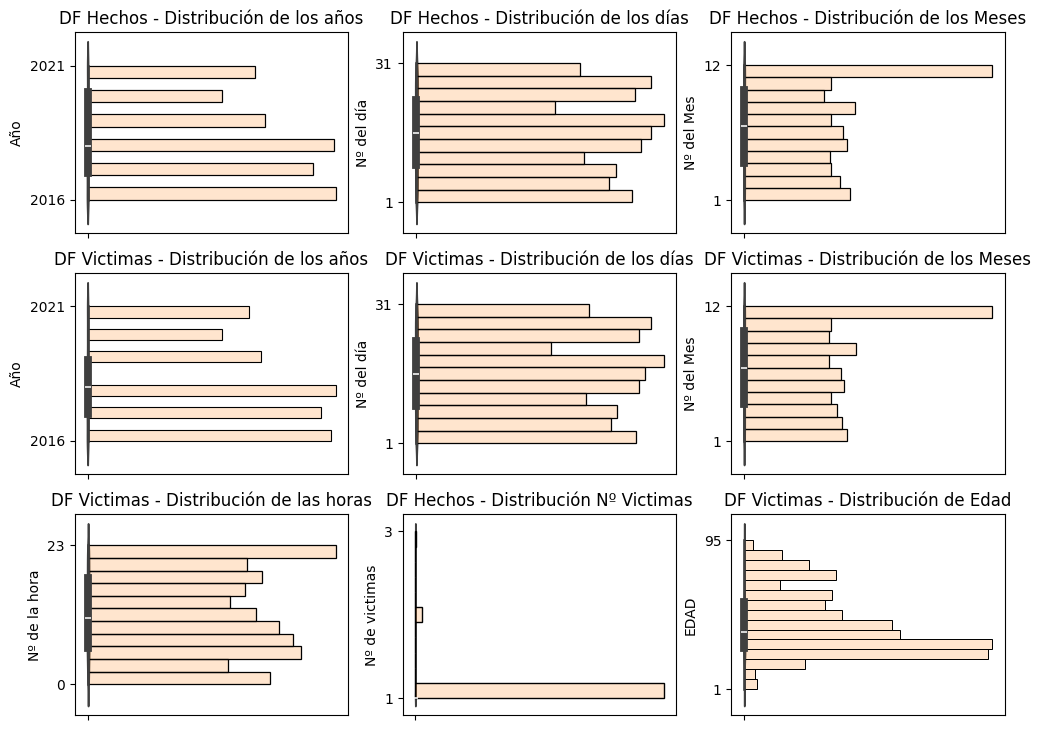

In [41]:
# Crear una figura de 12 pulgadas de ancho y 12 pulgadas de alto
fig = plt.figure(figsize=(12, 12))

# Crear una grilla de 4 filas y 3 columnas
gs = gridspec.GridSpec(4, 3)

#0,0_______________________________________________________________________

# Crear el gráfico en la celda
ax = fig.add_subplot(gs[0, 0])

# Crear el gráfico de violín
sns.violinplot(
    y = "AAAA",
    data = df_hechos,
    ax = ax
)
sns.histplot(
    data=df_hechos,
    y = "AAAA",
    alpha=0.2,
    ax=ax
)

# Agregar título y etiquetas a los ejes
ax.set_title("DF Hechos - Distribución de los años")
ax.set_xlabel("")
ax.set_ylabel("Año")
ax.set_yticks([min(df_hechos['AAAA']), max(df_hechos['AAAA'])])

#0,1_______________________________________________________________________

# Crear el gráfico en la celda
ax = fig.add_subplot(gs[0, 1])

# Crear el gráfico de violín
sns.violinplot(
    y = "DD",
    data = df_hechos,
    ax = ax
)
sns.histplot(
    data=df_hechos,
    y = "DD",
    alpha=0.2,
    ax=ax
)

# Agregar título y etiquetas a los ejes
ax.set_title("DF Hechos - Distribución de los días")
ax.set_xlabel("")
ax.set_ylabel("Nº del día")
ax.set_yticks([min(df_hechos['DD']), max(df_hechos['DD'])])

#0,2_______________________________________________________________________

# Crear el gráfico en la celda
ax = fig.add_subplot(gs[0, 2])

# Crear el gráfico de violín
sns.violinplot(
    y = "MM",
    data = df_hechos,
    ax = ax
)
sns.histplot(
    data=df_hechos,
    y = "MM",
    alpha=0.2,
    ax=ax
)

# Agregar título y etiquetas a los ejes
ax.set_title("DF Hechos - Distribución de los Meses")
ax.set_xlabel("")
ax.set_ylabel("Nº del Mes")
ax.set_yticks([min(df_hechos['MM']), max(df_hechos['MM'])])

#1,0_______________________________________________________________________

# Crear el gráfico en la celda
ax = fig.add_subplot(gs[1, 0])

# Crear el gráfico de violín
sns.violinplot(
    y = "AAAA",
    data = df_victimas,
    ax = ax
)
sns.histplot(
    data=df_victimas,
    y = "AAAA",
    alpha=0.2,
    ax=ax
)

# Agregar título y etiquetas a los ejes
ax.set_title("DF Victimas - Distribución de los años")
ax.set_xlabel("")
ax.set_ylabel("Año")
ax.set_yticks([min(df_victimas['AAAA']), max(df_victimas['AAAA'])])

#1,1_______________________________________________________________________

# Crear el gráfico en la celda
ax = fig.add_subplot(gs[1, 1])

# Crear el gráfico de violín
sns.violinplot(
    y = "DD",
    data = df_victimas,
    ax = ax
)
sns.histplot(
    data=df_victimas,
    y = "DD",
    alpha=0.2,
    ax=ax
)

# Agregar título y etiquetas a los ejes
ax.set_title("DF Victimas - Distribución de los días")
ax.set_xlabel("")
ax.set_ylabel("Nº del día")
ax.set_yticks([min(df_victimas['DD']), max(df_victimas['DD'])])

#1,2_______________________________________________________________________

# Crear el gráfico en la celda
ax = fig.add_subplot(gs[1, 2])

# Crear el gráfico de violín
sns.violinplot(
    y = "MM",
    data = df_victimas,
    ax = ax
)
sns.histplot(
    data=df_victimas,
    y = "MM",
    alpha=0.2,
    ax=ax
)

# Agregar título y etiquetas a los ejes
ax.set_title("DF Victimas - Distribución de los Meses")
ax.set_xlabel("")
ax.set_ylabel("Nº del Mes")
ax.set_yticks([min(df_victimas['MM']), max(df_victimas['MM'])])

#2,0_______________________________________________________________________

# Crear el gráfico en la celda
ax = fig.add_subplot(gs[2, 0])

# Crear el gráfico de violín
sns.violinplot(
    y = "HH",
    data = df_hechos,
    ax = ax
)
sns.histplot(
    data=df_hechos,
    y = "HH",
    alpha=0.2,
    ax=ax
)

# Agregar título y etiquetas a los ejes
ax.set_title("DF Victimas - Distribución de las horas")
ax.set_xlabel("")
ax.set_ylabel("Nº de la hora")
ax.set_yticks([min(df_hechos['HH']), max(df_hechos['HH'])])

#2,1_______________________________________________________________________

# Crear el gráfico en la celda
ax = fig.add_subplot(gs[2, 1])

# Crear el gráfico de violín
sns.violinplot(
    y = "N_VICTIMAS",
    data = df_hechos,
    ax = ax
)
sns.histplot(
    data=df_hechos,
    y = "N_VICTIMAS",
    alpha=0.2,
    ax=ax
)

# Agregar título y etiquetas a los ejes
ax.set_title("DF Hechos - Distribución Nº Victimas")
ax.set_xlabel("")
ax.set_ylabel("Nº de victimas")
ax.set_yticks([min(df_hechos['N_VICTIMAS']), max(df_hechos['N_VICTIMAS'])])

#2,2_______________________________________________________________________

# Crear el gráfico en la celda
ax = fig.add_subplot(gs[2, 2])

# Crear el gráfico de violín
sns.violinplot(
    y = "EDAD",
    data = df_victimas,
    ax = ax
)
sns.histplot(
    data=df_victimas,
    y = "EDAD",
    alpha=0.2,
    ax=ax
)

# Agregar título y etiquetas a los ejes
ax.set_title("DF Victimas - Distribución de Edad")
ax.set_xlabel("")
ax.set_ylabel("EDAD")
ax.set_yticks([min(df_victimas['Edad']), max(df_victimas['EDAD'])])






De la distribución de los variables cuantitativas se puede concluir:
1. El número de víctimas por año a decaído con el paso del tiempo
2. El número de víctimas por día es constante a los largo del mes
3. Durante fin de año se concentran los accidentes
4. La media mañana y la medianoche son los horarios con mayor riesgo de accidente
5. El número de víctimas por accidente es generalmente igual a 1
6. Los adultos jóvenes son los más accidentados

In [42]:
# 10. Gráficos coherentes según la tipología de variable.

# Se pueden realizar gráficos de barras para comparar el conteo de variables cualitativas nominales:

# Dataframe Hechos:
# TIPO_DE_CALLE
# COMUNA
# VICTIMA
# ACUSADO

# Dataframe Victimas:
# SEXO
# ROL


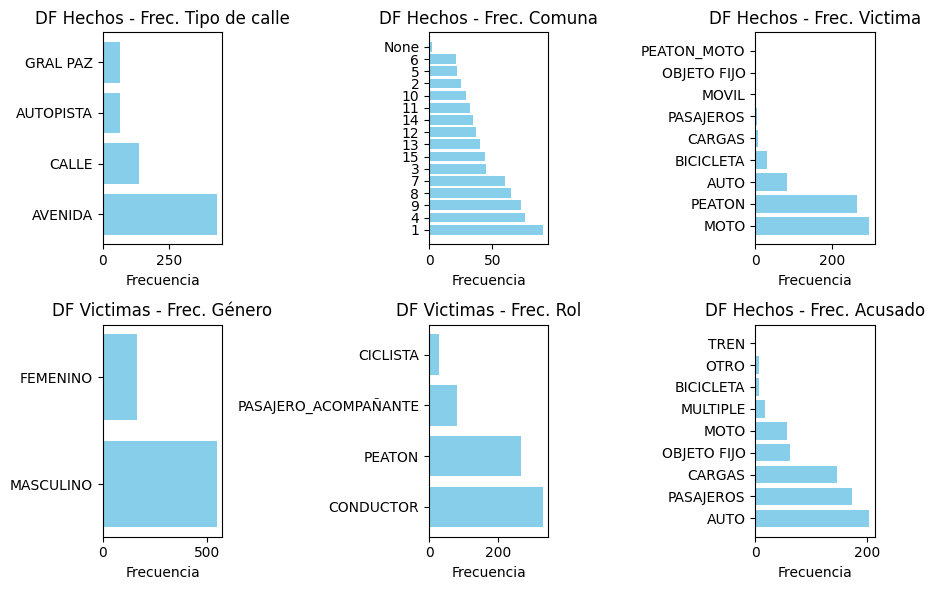

In [43]:
# Crear una figura de 9 pulgadas de ancho y 6 pulgadas de alto
fig = plt.figure(figsize=(9, 6))

# Crear una grilla de 3 filas y 2 columnas
gs = gridspec.GridSpec(2, 3)

#0,0_______________________________________________________________________

# Crear el gráfico en la celda
ax = fig.add_subplot(gs[0, 0])

# Contar elementos de la variable cualitativa
conteo = df_hechos ['TIPO_DE_CALLE'].value_counts()

plt.barh(conteo.index, conteo.values, color='skyblue')
plt.xlabel('Frecuencia')
plt.title('DF Hechos - Frec. Tipo de calle')

#0,1_______________________________________________________________________

# Crear el gráfico en la celda
ax = fig.add_subplot(gs[0, 1])

# Contar elementos de la variable cualitativa
conteo = df_hechos ['COMUNA'].value_counts()

plt.barh(conteo.index, conteo.values, color='skyblue')
plt.xlabel('Frecuencia')
plt.title('DF Hechos - Frec. Comuna')

# Ajustar el layout para evitar la superposición de los rótulos
plt.tight_layout()


#0,2_______________________________________________________________________

# Crear el gráfico en la celda
ax = fig.add_subplot(gs[0, 2])

# Contar elementos de la variable cualitativa
conteo = df_hechos ['VICTIMA'].value_counts()

plt.barh(conteo.index, conteo.values, color='skyblue')
plt.xlabel('Frecuencia')
plt.title('DF Hechos - Frec. Victima')

# Ajustar el layout para evitar la superposición de los rótulos
plt.tight_layout()

#1,0_______________________________________________________________________

# Crear el gráfico en la celda
ax = fig.add_subplot(gs[1, 0])

# Contar elementos de la variable cualitativa
conteo = df_victimas ['SEXO'].value_counts()

plt.barh(conteo.index, conteo.values, color='skyblue')
plt.xlabel('Frecuencia')
plt.title('DF Victimas - Frec. Género')

# Ajustar el layout para evitar la superposición de los rótulos
plt.tight_layout()

#1,1_______________________________________________________________________

# Crear el gráfico en la celda
ax = fig.add_subplot(gs[1, 1])

# Contar elementos de la variable cualitativa
conteo = df_victimas ['ROL'].value_counts()

plt.barh(conteo.index, conteo.values, color='skyblue')
plt.xlabel('Frecuencia')
plt.title('DF Victimas - Frec. Rol')

# Ajustar el layout para evitar la superposición de los rótulos
plt.tight_layout()

#1,2_______________________________________________________________________

# Crear el gráfico en la celda
ax = fig.add_subplot(gs[1, 2])

# Contar elementos de la variable cualitativa
conteo = df_hechos ['ACUSADO'].value_counts()

plt.barh(conteo.index, conteo.values, color='skyblue')
plt.xlabel('Frecuencia')
plt.title('DF Hechos - Frec. Acusado')

# Ajustar el layout para evitar la superposición de los rótulos
plt.tight_layout()



In [44]:
# Por último falta corroborar si las coordenadas provistas en el dataframe Hechos corresponden efectivamente a
#  la Ciudad Autonoma de Buenos Aires (CABA)

# Eliminar filas con valores NaN en las columnas 'X' y 'Y' y guardar en un nuevo DataFrame
df_hechos_coord = df_hechos.dropna(subset=['X', 'Y'])

# Ordenar los pares de valores de las columnas 'X' e 'Y' en un formato de lista de tuplas
coordenadas_ordenadas = sorted(zip(df_hechos_coord['Y'], df_hechos_coord['X']))

# Crear un mapa centrado en Buenos Aires
mapit = folium.Map(location=[-34.6037, -58.3816], zoom_start=11)

# Añadir los marcadores al mapa como puntos pequeños
for coord in coordenadas_ordenadas:
    folium.CircleMarker(location=[coord[0], coord[1]], radius=1, color='red', fill=True, fill_color='#3186cc').add_to(mapit)

# Mostrar el mapa
mapit


De la distribución de los variables cualitativas nominales se puede concluir:
1. La gran mayoría de los accidentes ocurren en avenidas y calles
2. Los accidentes se concentran en el Sur y en el área comercial y turística (Ver Mapa de comunas de CABA)
3. La gran mayoría de las víctimas son peatones, o pasajeros de autos y motos
4. La gran mayoría de las víctimas son hombres
5. La gran mayoría de las víctimas con vehículo son conductores
6. La mayoría de los acusados son pasajeros de autos y transporte de cargas
7. Las coordenadas de los accidentes corresponden al territorio de CABA

<img src="https://upload.wikimedia.org/wikipedia/commons/4/4b/Buenos_Aires_Comunas.svg" title="Mapa de comunas de CABA" alt="Mapa de comunas de CABA" style="width: 3in; height: 3in;">

In [45]:
# Exportación de datos a archivos CSV

df_hechos.to_csv('HECHOS.csv', index=False , sep=',', decimal='.')
df_victimas.to_csv('VICTIMAS.csv' , index=False , sep=',', decimal='.')